In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
X,y = datasets.make_moons(noise=0.25,random_state=666)  # 制作样本数据，产生的结果为一个简单的样本数据集，用于可视化聚类算法和分类算法。

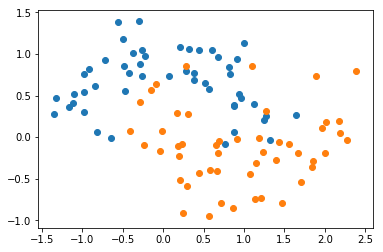

In [3]:
plt.scatter(X[y == 0,0],X[y == 0,1])  # y等于0的两个特征
plt.scatter(X[y == 1,0],X[y == 1,1])  # y等于1的两个特征
plt.show()

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()  # 直到基尼系数均为0为止
dt_clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)  # 以不同的颜色进行划分

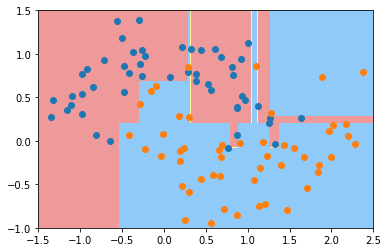

In [12]:
plot_decision_boundary(dt_clf,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0,0],X[y == 0,1])
plt.scatter(X[y == 1,0],X[y == 1,1])
plt.show()

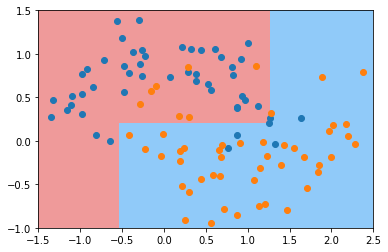

In [13]:
dt_clf2 = DecisionTreeClassifier(max_depth=2)  # 限制最大深度为2
dt_clf2.fit(X,y)

plot_decision_boundary(dt_clf2,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0,0],X[y == 0,1])
plt.scatter(X[y == 1,0],X[y == 1,1])
plt.show()

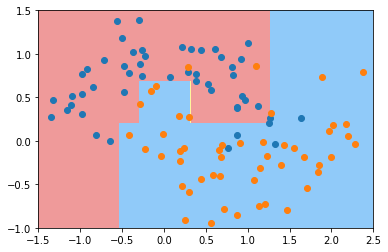

In [21]:
dt_clf3 = DecisionTreeClassifier(min_samples_split=10)  # 至少要有多少个数据，才会继续拆分下去
dt_clf3.fit(X,y)

plot_decision_boundary(dt_clf3,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0,0],X[y == 0,1])
plt.scatter(X[y == 1,0],X[y == 1,1])
plt.show()

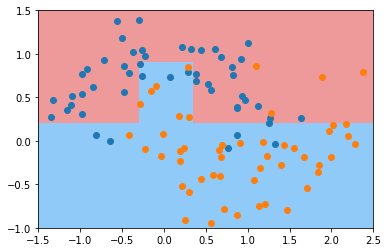

In [22]:
dt_clf4 = DecisionTreeClassifier(min_samples_leaf=6)  # 对于叶子节点来说，至少需要多少个样本数据
dt_clf4.fit(X,y)

plot_decision_boundary(dt_clf4,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0,0],X[y == 0,1])
plt.scatter(X[y == 1,0],X[y == 1,1])
plt.show()

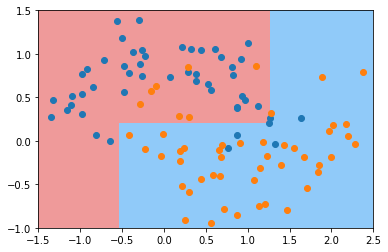

In [23]:
dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=4)  # 叶子节点的最多个数
dt_clf5.fit(X,y)

plot_decision_boundary(dt_clf5,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(X[y == 0,0],X[y == 0,1])
plt.scatter(X[y == 1,0],X[y == 1,1])
plt.show()

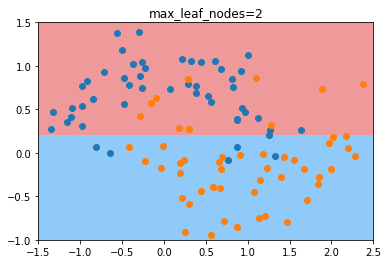

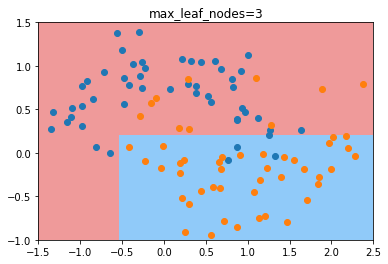

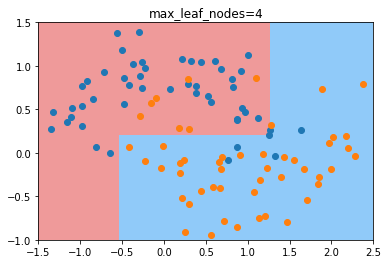

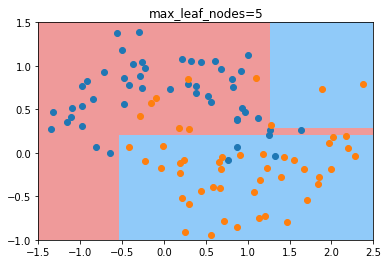

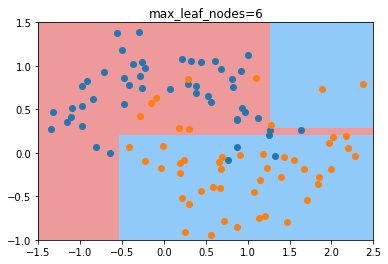

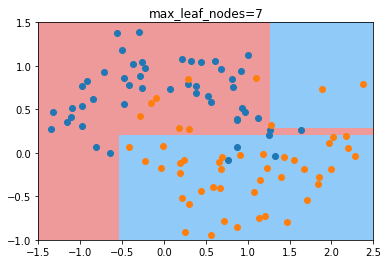

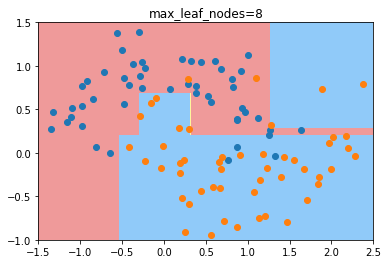

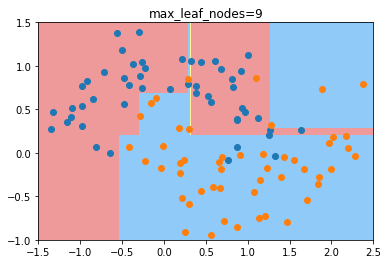

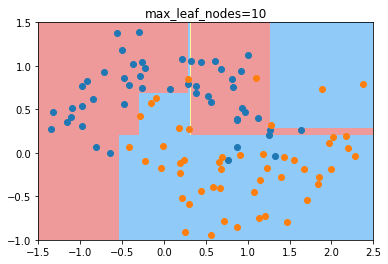

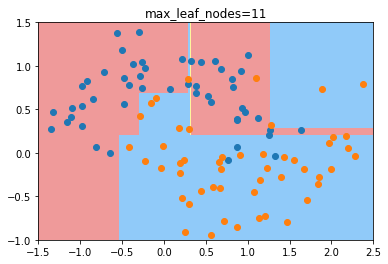

In [33]:
for i in range(10):
    dt_clf5 = DecisionTreeClassifier(max_leaf_nodes=i+2)  # 叶子节点的最多个数
    dt_clf5.fit(X,y)

    plot_decision_boundary(dt_clf5,axis=[-1.5,2.5,-1.0,1.5])
    plt.scatter(X[y == 0,0],X[y == 0,1])
    plt.scatter(X[y == 1,0],X[y == 1,1])
    plt.title("max_leaf_nodes=%d" % (i + 2))
    plt.show()